<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/Time_Series_Analysis_with_NeuralProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:**

Influenza surveillance season: Influenza surveillance seasons run from Week 40 through Week 39.
Values include:
2001-2002, 2002-2003, 2003-2004, 2004-2005, 2005-2006, 2006-2007, 2007-2008, 2008-2009, 2009-2010, 2010-2011, 2011-2012, 2012-2013, 2013-2014, 2014-2015, 2015-2016, 2016-2017, 2017-2018.

Date Code: yyyyww

Weekending: Date of the last day included in the CDC MMWR Week (Saturday). Format MM/DD/YYYY.

**Region**

Values:

Bay Area:  Includes Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano, and Sonoma counties
California: All California counties

Central: Includes Calaveras, Fresno, Inyo, Kings, Madera, Mariposa, Merced, Mono, Monterey, San Benito, San Joaquin, Stanislaus, Tulare, and Tuolumne counties

Lower Southern: Includes Imperial, Orange, Riverside, San Bernardino, and San Diego counties

Northern: Includes Alpine, Amador, Butte, Colusa, Del Norte, El Dorado, Glenn, Humboldt, Lake, Lassen, Mendocino, Modoc, Nevada, Placer, Plumas, Sacramento, Shasta, Sierra, Siskiyou, Sutter, Tehama, Trinity, Yolo, and Yuba counties

Upper Southern: Includes Kern, Los Angeles, San Luis Obispo, Santa Barbara, and Ventura counties

Note: Not all counties in region have outpatient ILI data providers

**Total_ILI**:
Number of outpatient visits for influenza-like illness (ILI)

**Total_Patients_Seen**:
Total patients seen for any reason

**Percent_ILI**:
Percentage of patients that were due to influenza-like illness

**Number_Providers_Reporting**:
Number of providers reporting data during given week and region

In [1]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

Found existing installation: torch 1.13.1
Uninstalling torch-1.13.1:
  Successfully uninstalled torch-1.13.1
Found existing installation: notebook 6.5.5
Uninstalling notebook-6.5.5:
  Successfully uninstalled notebook-6.5.5
Found existing installation: notebook_shim 0.2.3
Uninstalling notebook_shim-0.2.3:
  Successfully uninstalled notebook_shim-0.2.3
Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Successfully uninstalled tensorflow-2.14.0
Found existing installation: tensorflow-datasets 4.9.3
Uninstalling tensorflow-datasets-4.9.3:
  Successfully uninstalled tensorflow-datasets-4.9.3
Found existing installation: prophet 1.1.5
Uninstalling prophet-1.1.5:
  Successfully uninstalled prophet-1.1.5
Found existing installation: torchaudio 2.1.0+cu118
Uninstalling torchaudio-2.1.0+cu118:
  Successfully uninstalled torchaudio-2.1.0+cu118
Found existing installation: torchdata 0.7.0
Uninstalling torchdata-0.7.0:
  Successfully uninstalled torchdata-0.7.0
Found

In [2]:
!pip install neuralprophet
# or
# !pip install git+https://github.com/ourownstory/neural_prophet.git

  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires torchvision>=0.11, which is not installed.


In [3]:
from neuralprophet import NeuralProphet

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [9]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/_Python/flu-ili-byregion-fluseason-v1.csv')
df.head()

date          region  Total_ILI  Total_Patients_Seen  Percent_ILI  \
0  2001-10-06        Bay Area          3                  135         2.22   
1  2001-10-06      California         25                 1211         2.06   
2  2001-10-06         Central          0                    0          NaN   
3  2001-10-06  Lower Southern          2                  336         0.60   
4  2001-10-06        Northern         20                  529         3.78   

   Number_Providers_Reporting  
0                           2  
1                          14  
2                           0  
3                           4  
4                           4

In [2]:
#df.columns = ['date', 'Total_Patients_Seen']

# **Loading the dataset**
For our tutorials we work with energy price data over the 4 years from Spain. The dataset was published on Kaggle and contains a lot of information to which we will come back later. For now we use a prepared version of the dataset with the daily energy price data only.

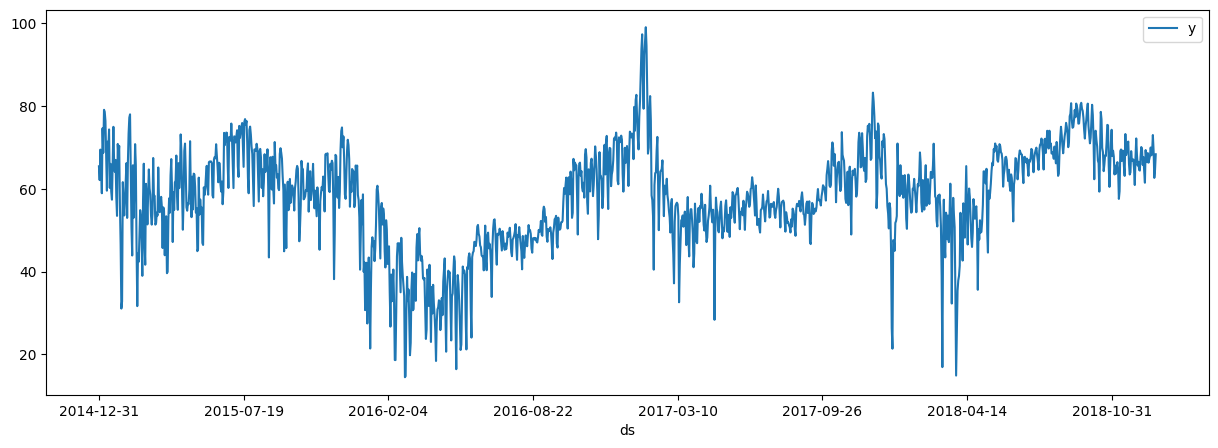

In [5]:
# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
# Plot the dataset, showing price (y column) over time (ds column)
plt = df.plot(x="ds", y="y", figsize=(15, 5))

In [6]:
df.head(n=2)

ds      y
0  2014-12-31  65.41
1  2015-01-01  62.09

Note: Whenever you use a dataset with NeuralProphet, it must be a pandas dataframe with the following format and properties:

1 - Time series column must be named "ds" and contain datetime values.

2 - Value column must be named "y" and contain float values.

# **Setting up the model**

In [7]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
#set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet()
# Use static plotly in notebooks
m.set_plotting_backend("matplotlib")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Di

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

# **Forecast the future**
To predict future values we have to extend our dataframe. In our example we want to create a forecast of the next year (meaning 365 days). Then we have to run the prediction again on the extended dataframe.

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


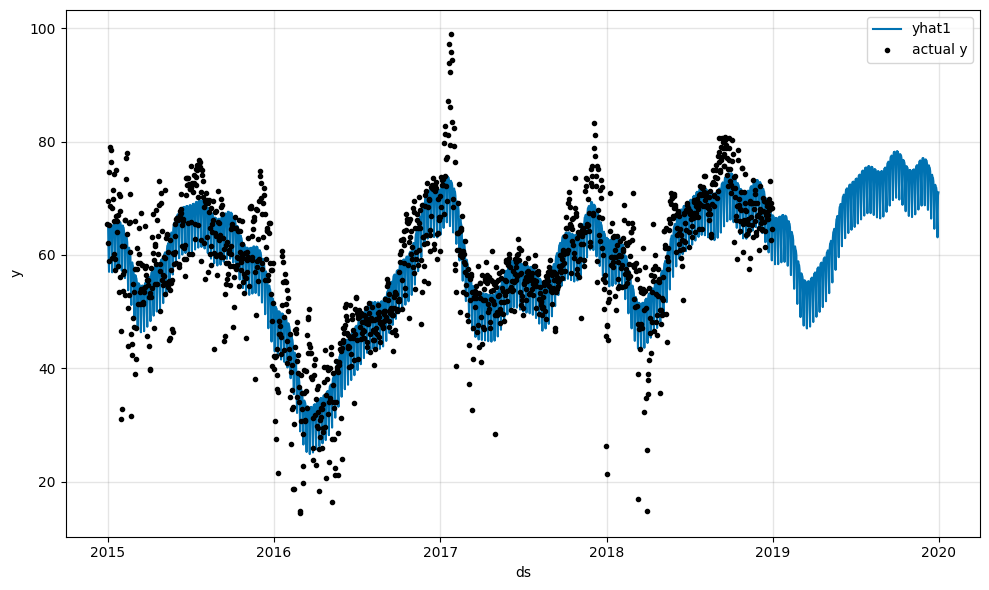

In [8]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=365)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

The forecast is composed of the following components: trend, yearly and weekly seasonality. They are added together to create the forecast.

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


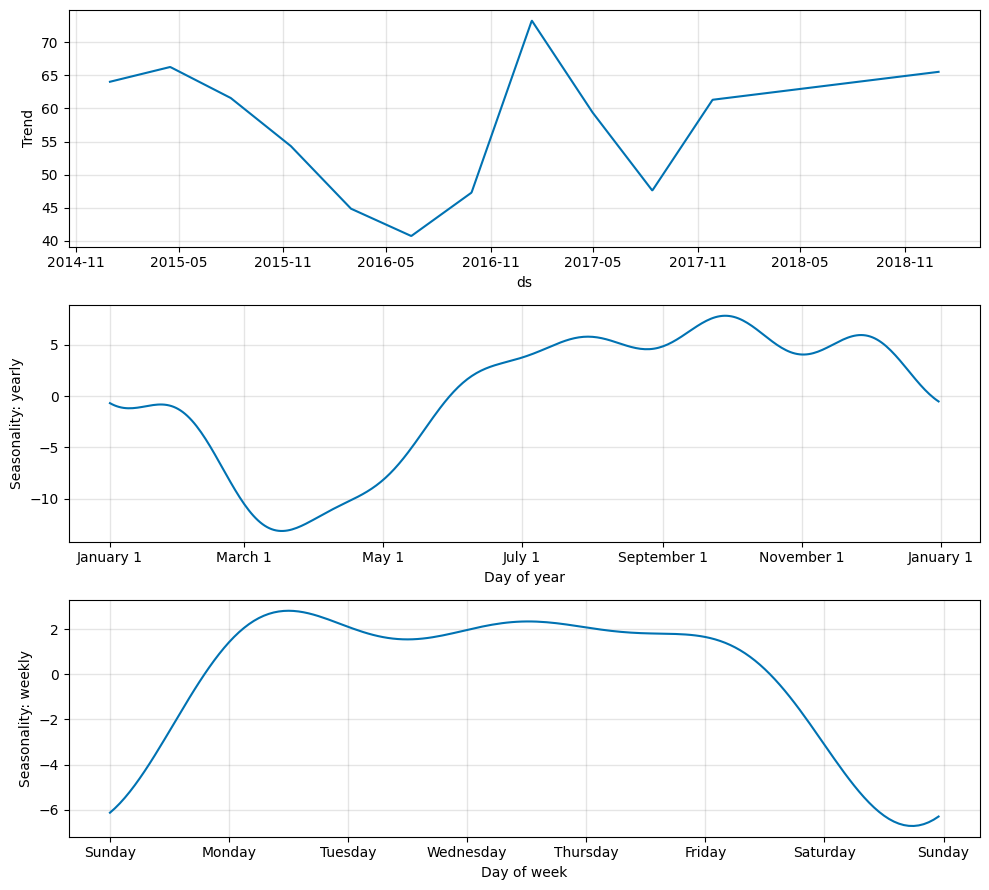

In [9]:
# The forecast is composed of the following components: trend, yearly and
# weekly seasonality. They are added together to create the forecast.

m.plot_parameters(components=["trend", "seasonality"])

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


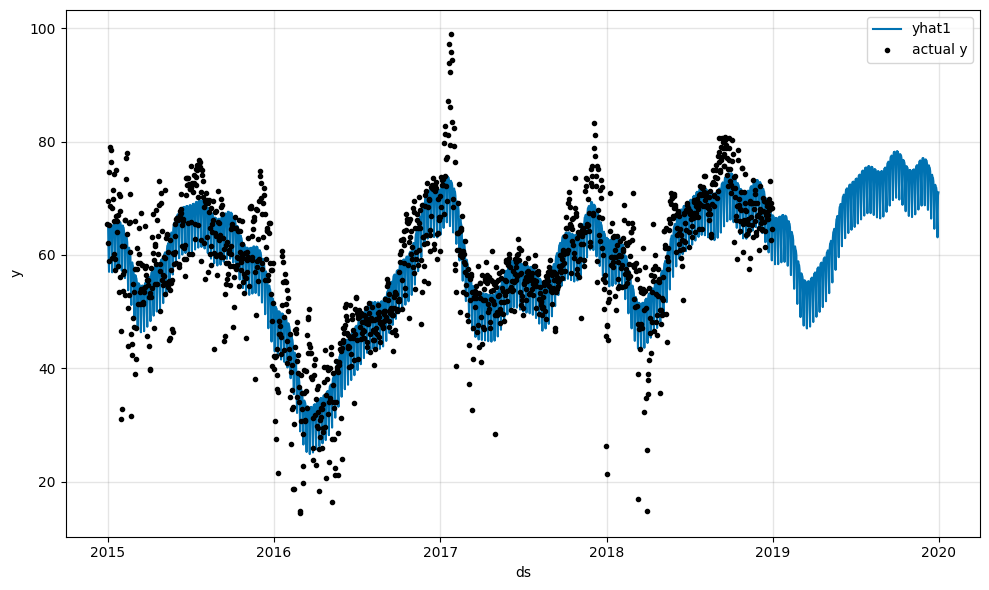

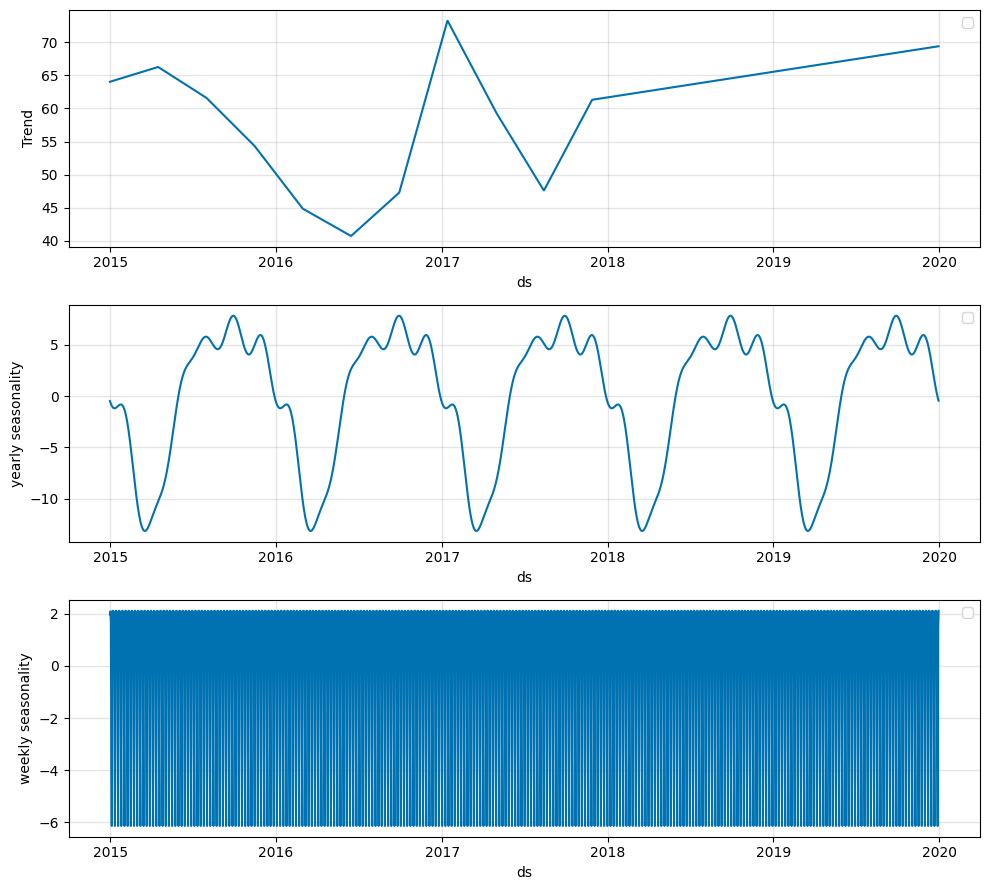

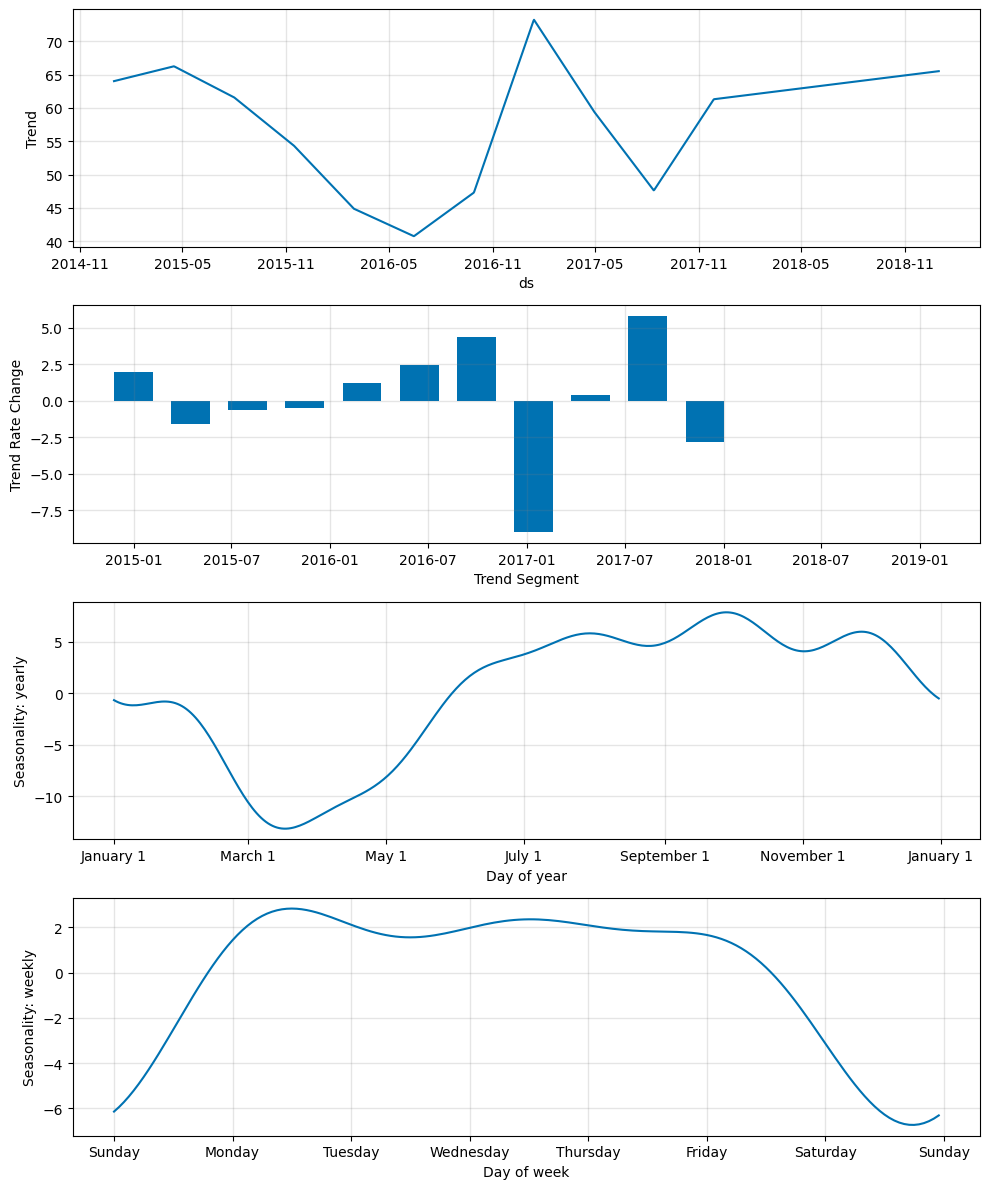

In [10]:
# You can visualize your results with the inbuilt plotting functions:

fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()

# **Trends**
In this section we will learn how to use the Trend component to model the trends of a time series.

We start with the same setup from the previous tutorial in terms of importing the necessary libraries and loading the data.

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - A

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


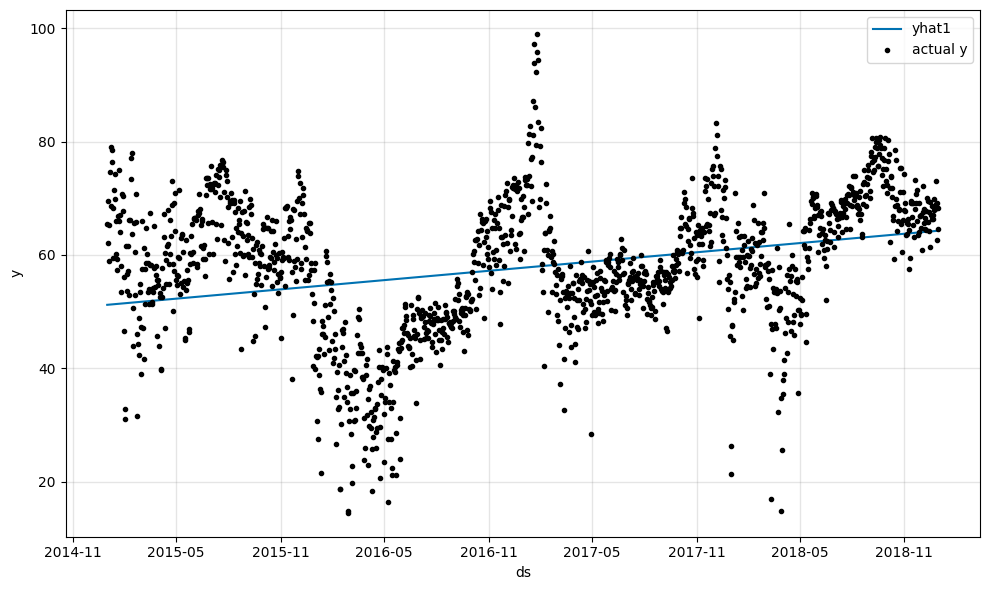

In [14]:
# Model and prediction
m = NeuralProphet(
    # Disable change trendpoints
    n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

We already see a linear trend line in the plot which fits well to the data.

Let us explore which trends could be seen in our dataset and how our model automatically fitted to those trends. Later we look into how to fine tune the model trend parameters.

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


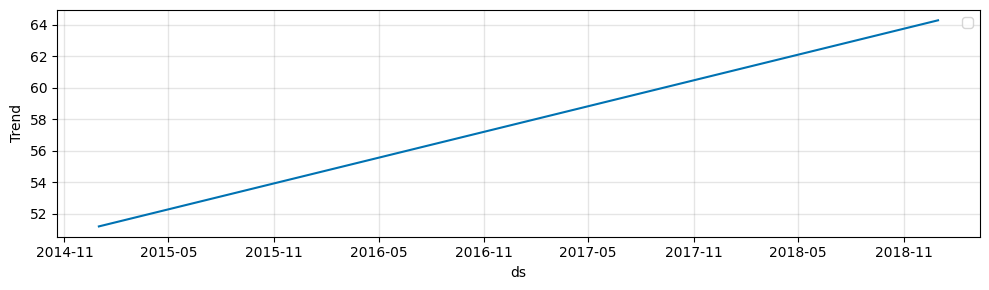

In [15]:
m.plot_components(forecast, components=["trend"])

NeuralProphet uses a classic approach to model the trend as the combination of an offset m and a growth rate k. The trend effect at a time t1 is given by multiplying the growth rate k by the difference (t1 - t0) in time since the starting point t0 on top of the offset m.

trend(t1) = m + k.(t1-t0) = trend(t0) + k.(t1-t0)

After learning about the theory of the trend, we use the model to predict the trend into the future and see how our trend line will continue.

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


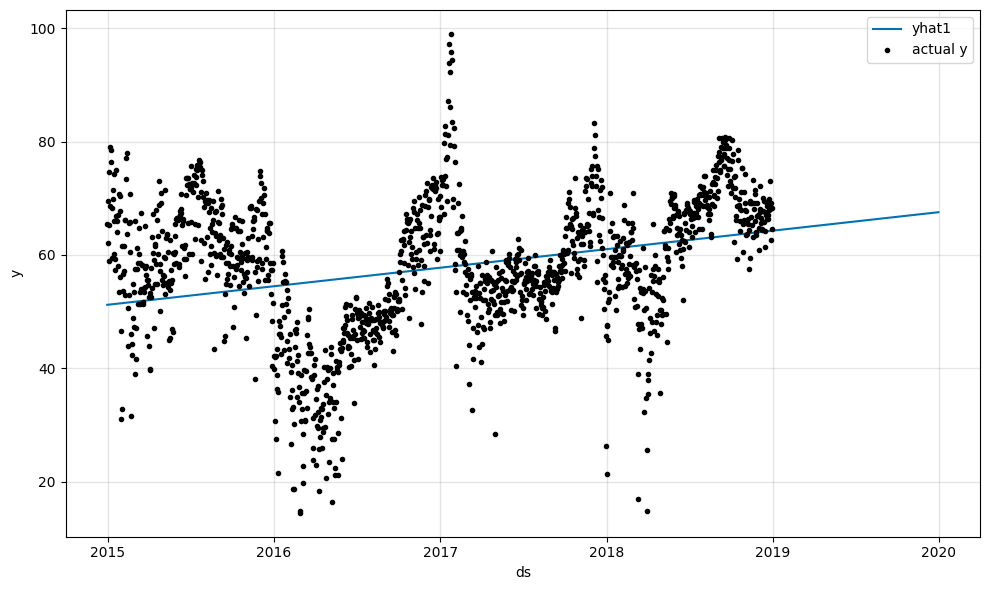

In [16]:
df_future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

The linear trend line does continue in the future. Overall there is a slight upward trend in the data.

After learning the basics of the trend in NeuralProphet, let's look into the trend changepoints we disabled earlier. Trend changepoints are points in time where the trend changes. NeuralProphet automatically detects these changepoints and fits a new trend line to the data before and after the changepoint. Let's see how many changepoints NeuralProphet detected.

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - A

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


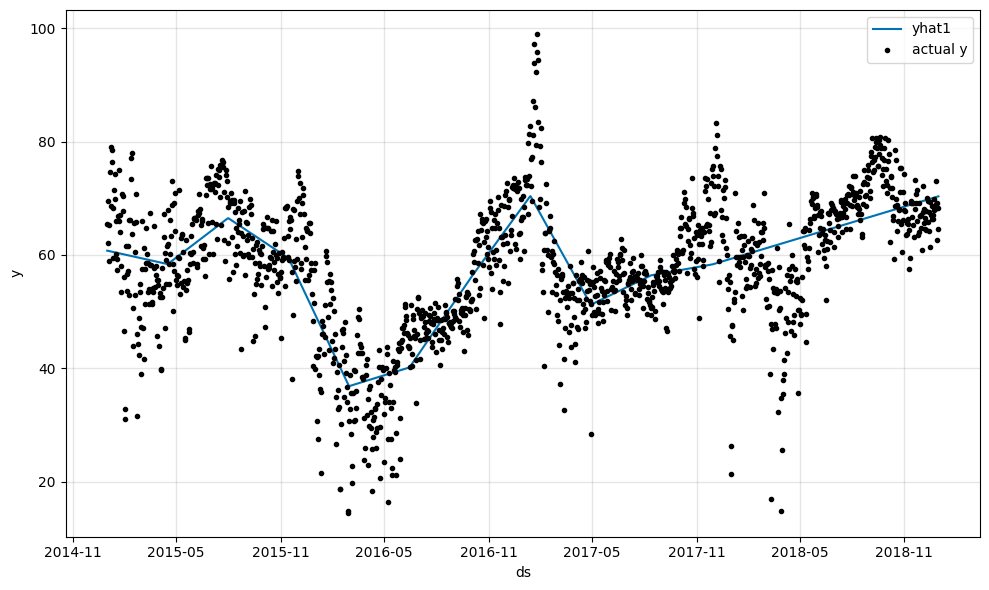

In [17]:
# Model and prediction
m = NeuralProphet(
    # Use default number of change trendpoints (10)
    # n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


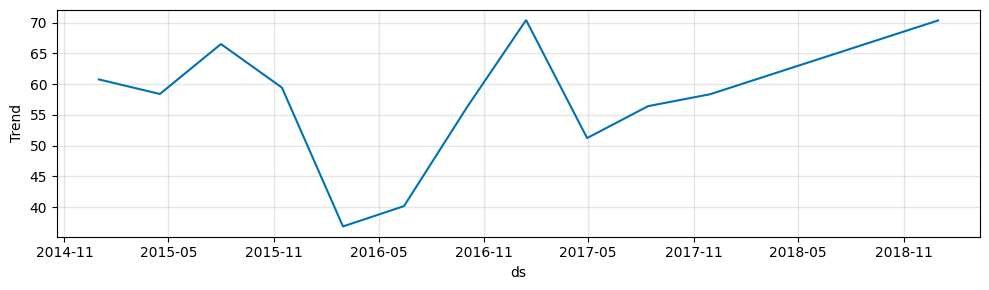

In [18]:
m.plot_parameters(components = ["trend"])

Now the trendline does fit the data way better. We can see that NeuralProphet used the default parameter of 10 changepoints and fit them to our data.

# **Seasonality**

We will explore the seasonality component of NeuralProphet. It allows the model to capture seasonal effects, such as a positive or negative bias for a given day of the week.

In the second tutorial covering Trends, we disabled seasonality. Let us enable the seasonality step by step again, starting with the yearly seasonality. We give it a try and then see what effects it has on the model. We will keep the trend linear with no changepoints for simplicity.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

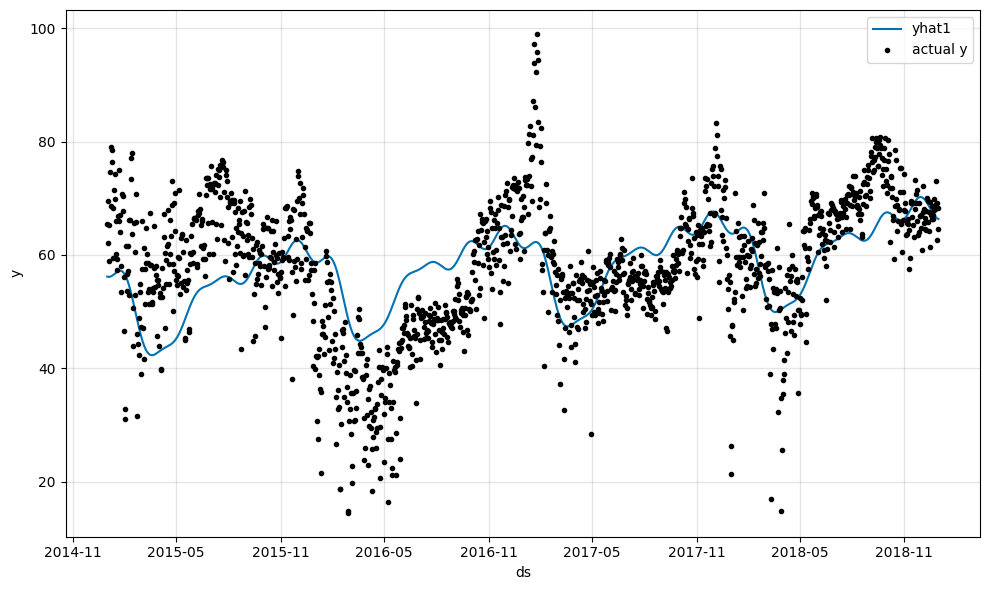

In [20]:
# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction with yearly seasonality
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=0,
    # Disable seasonality components, except yearly
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.set_plotting_backend("matplotlib")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Plotting all components of the forecast we see that the forecast is composed of the trend and the yearly seasonality in an additive way. This means our prediction y^ is the sum of the trend and the seasonality:

Prediction(t) = y^(t) = trend(t) + seasonality_yearly.(t)

We can see this more cleary when we plot the trend and the seasonality components separately.

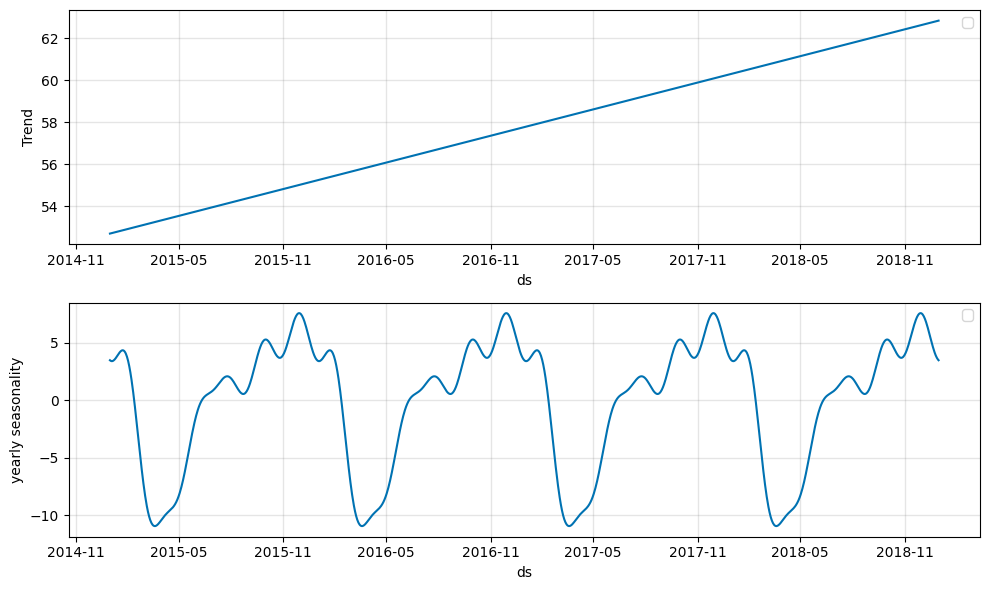

In [21]:
m.plot_components(forecast)

The functions plot_paramters and plot_components allow you to specify which components to plot. So for the next visualizations we will focus on the seasonality alone (respectively not showing the trend).

An alternative way to visualize the seasonality is to plot the model parameters with plot_paramters. In the following visualization the contribution of the seasonality is shown for only one period, here a single year for the yearly seasonality.

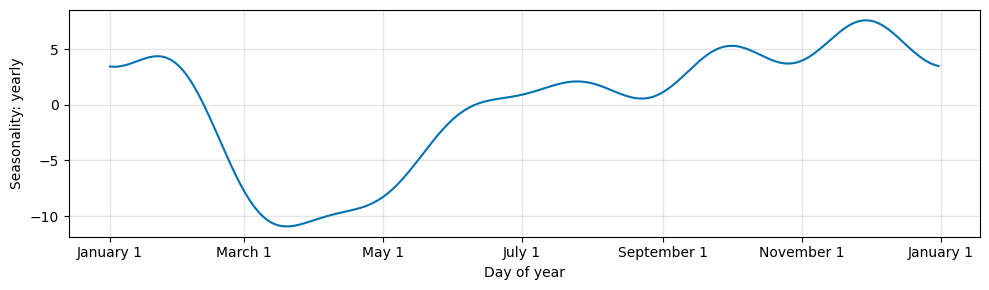

In [22]:
m.plot_parameters(components=["seasonality"])

Seasonality in NeuralProphet is modeled with the help of Fourier terms. You can think of Fourier terms as the sum of multiple sine and cosine functions with different periodicities and magnitudes. This way NeuralProphet can model multiple seasonalities. The seasonality can be of arbitrary periodicities (length), for example a yearly seasonality with daily data (p = 365.25) or with weekly data (p = 52.18).

You can read more on Fourier terms on Wikipedia and about the detailed inner workings of seasonality in the paper on NeuralProphet under the NeuralProphet model section.

By default, each of the the yearly, weekly and daily seasonalities are automatically enabled if the data is of higher frequency than the respective seasonality and if two full periods of the seasonality are in the training data. For example, daily seasonality is automatically enabled if the data is of hourly resolution and at least two full days are recorded.

We continue by manually enabling the yearly, weekly and daily seasonalities and see what that does.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

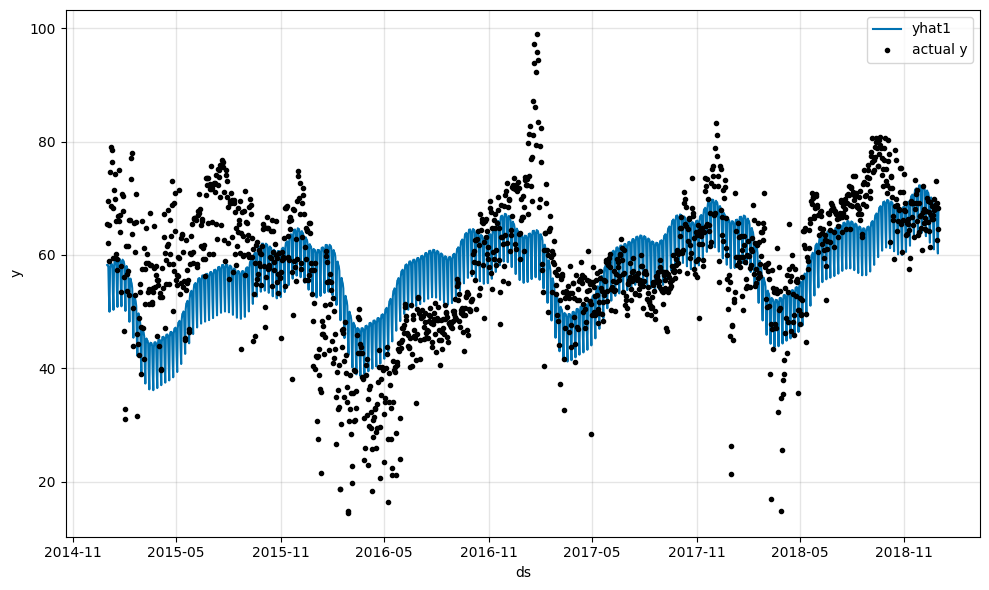

In [24]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=0,
    # Enable all seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
m.set_plotting_backend("matplotlib")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

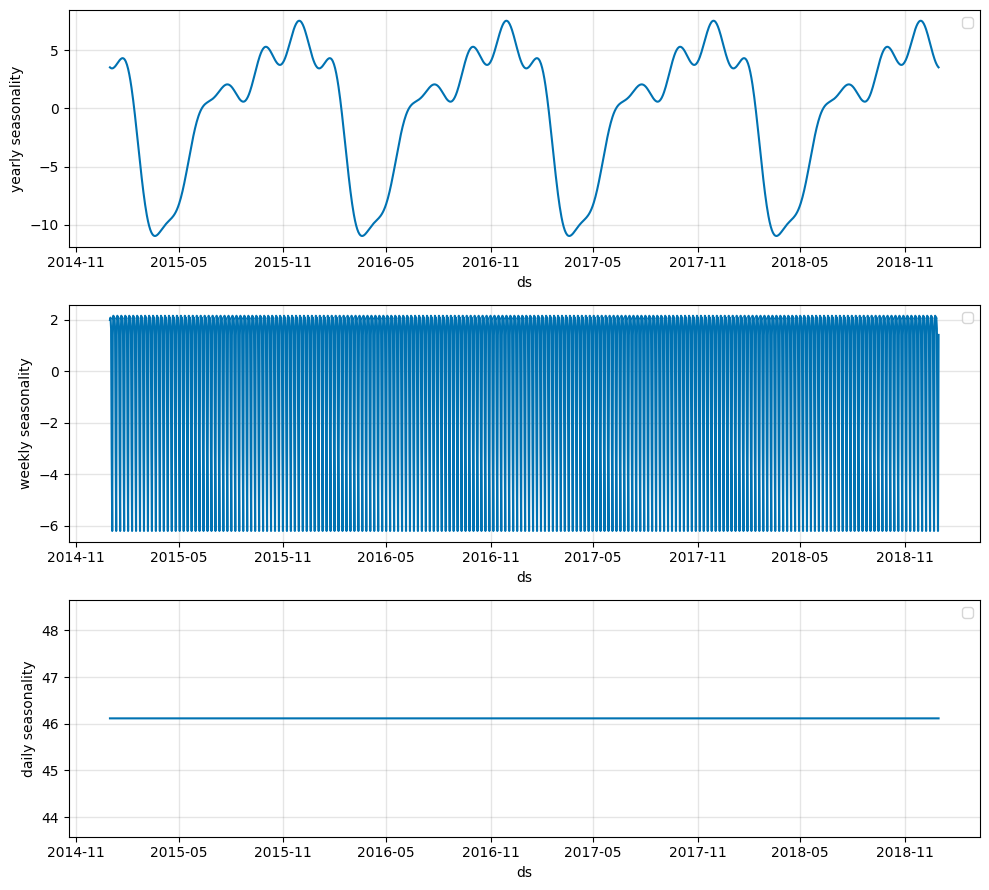

In [25]:
m.plot_components(forecast, components=["seasonality"])

Plotting the three seasonalities, we see a flat line for the daily seasonality. This is expected as the data is daily and thus does not have intra-day differences.

For the weekly seasonality we can zoom in or plot a single period with plot_parameters.

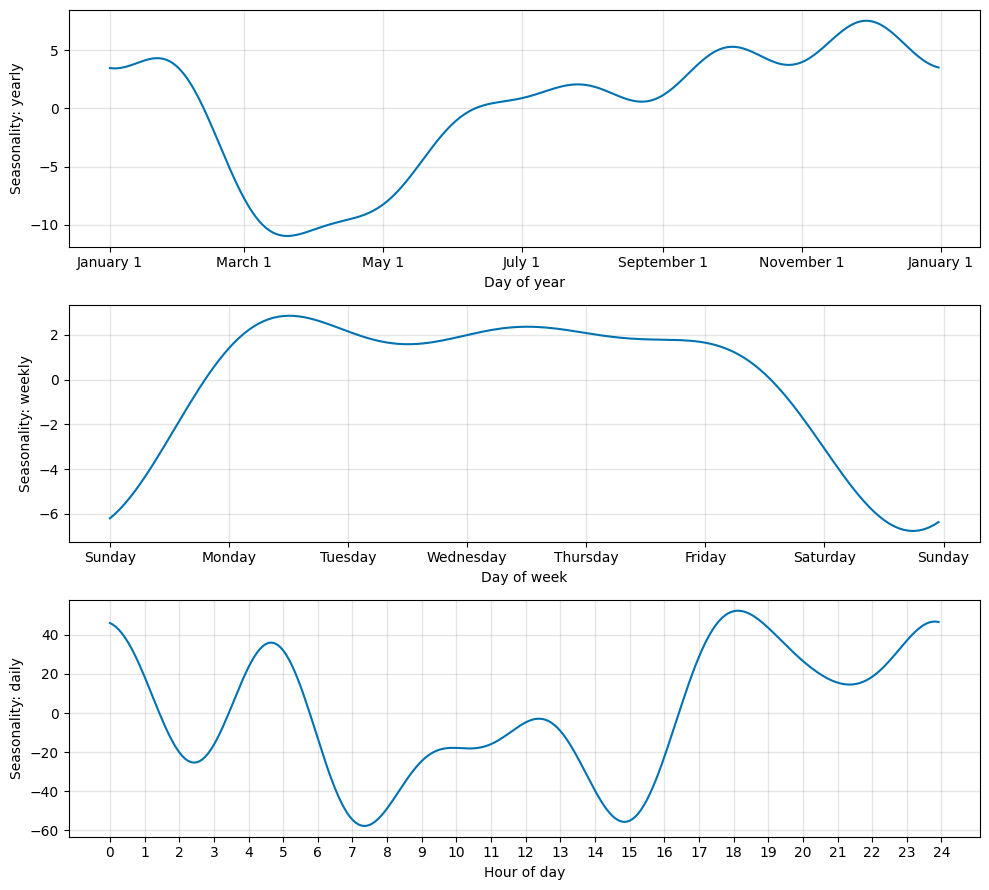

In [26]:
m.plot_parameters(components=["seasonality"])

Note: The pattern for daily seasonality is plain noise, as it has no intra-day data to be fitted on. This is one limitation of the Fourier term approach: Though we are able to fit continuous seasonalities, periods between observation samples may be subject to overfitting. This can be addressed by disabling seasonalities or setting them to a lower number of Fourier terms, reducing their complexity.

# **Auto Regression**

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

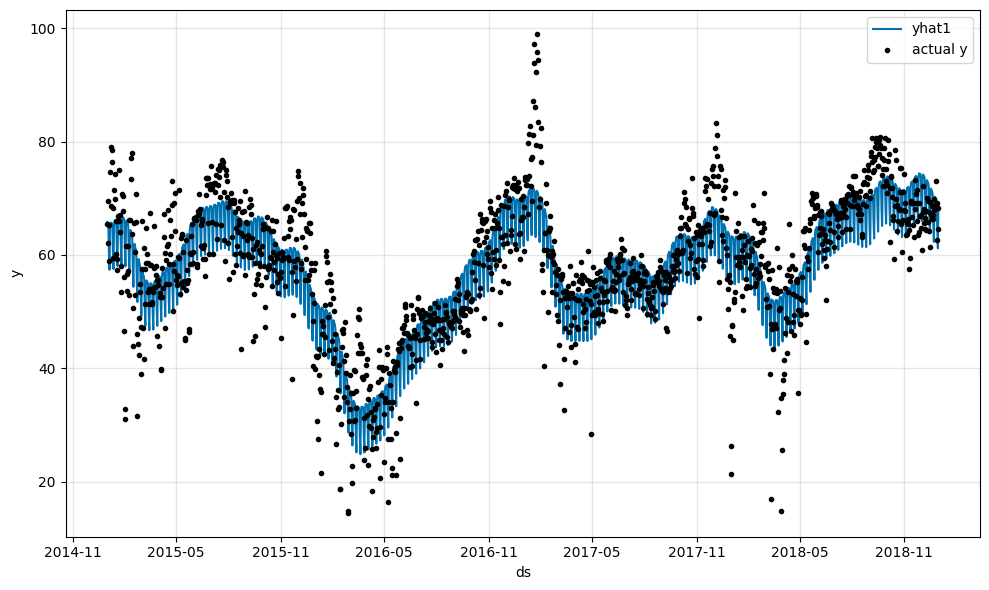

In [28]:
# Model and prediction
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
m.set_plotting_backend("matplotlib")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

To better understand what the remaining mismatch between our model and the real data is, we can look at the residuals. The residuals are the difference between the model's prediction and the real data. If the model is perfect, the residuals should be zero.

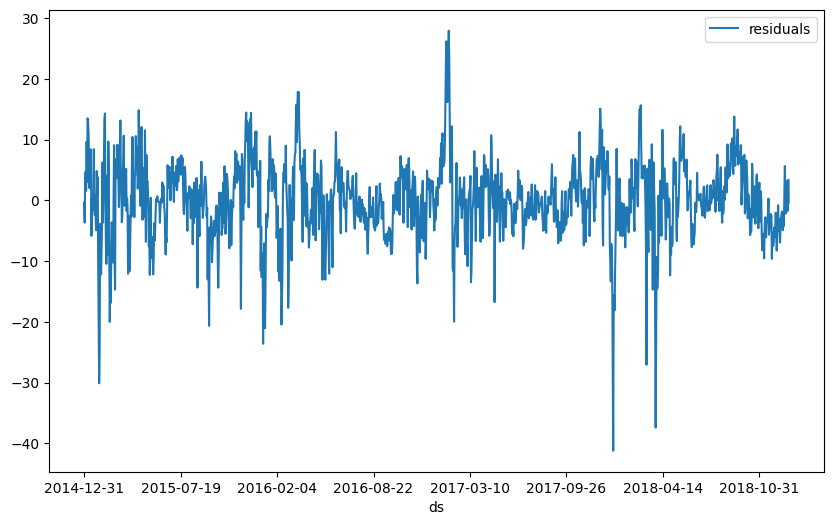

In [29]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

Let us explore what a good value for the autoregression would be. Create a autocorrelation chart.

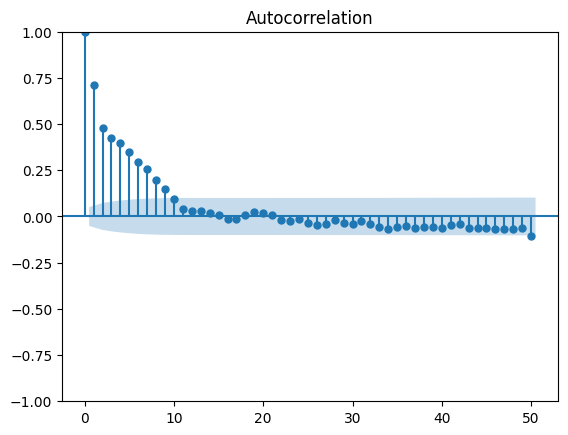

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

plt = plot_acf(df_residuals["residuals"], lags=50)

Now we add autoregression to our model with the n_lags parameter.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

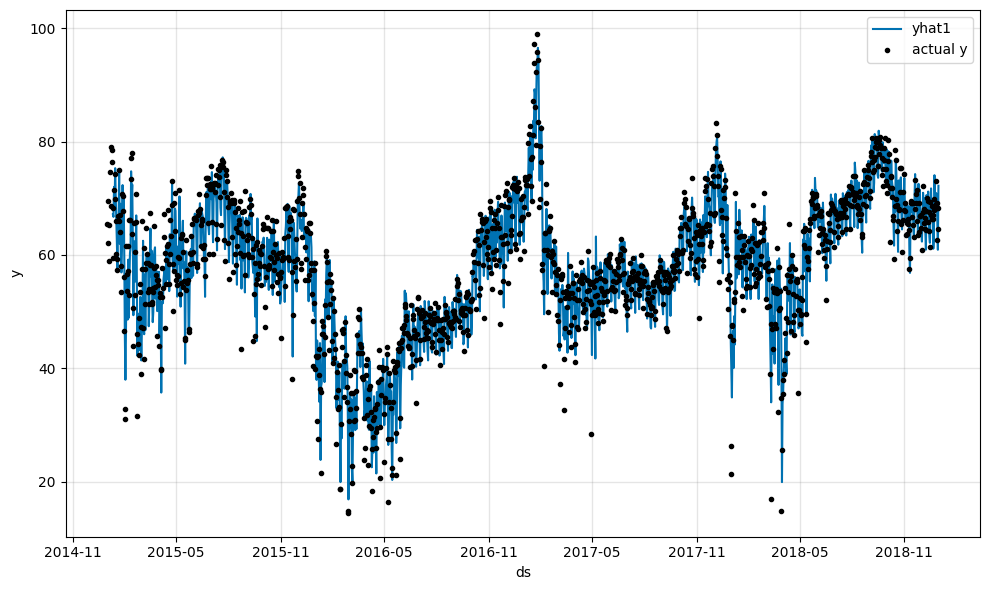

In [31]:
# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

As we can see the forecasting model with autoregression does fit the data a lot better than the base model. Feel free to explore how different numbers of lags n_lags affect the model.

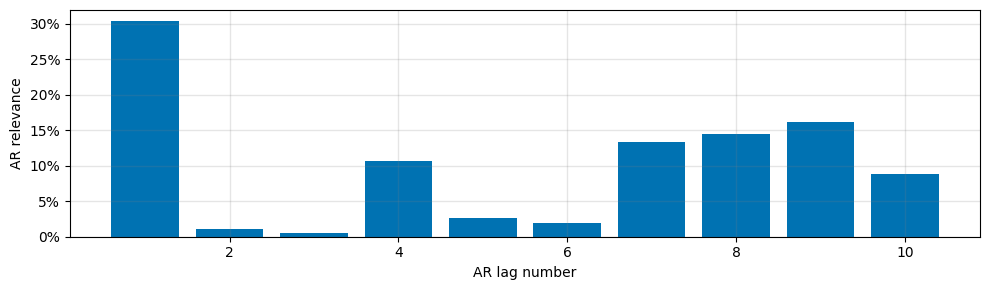

In [32]:
m.plot_parameters(components=["autoregression"])

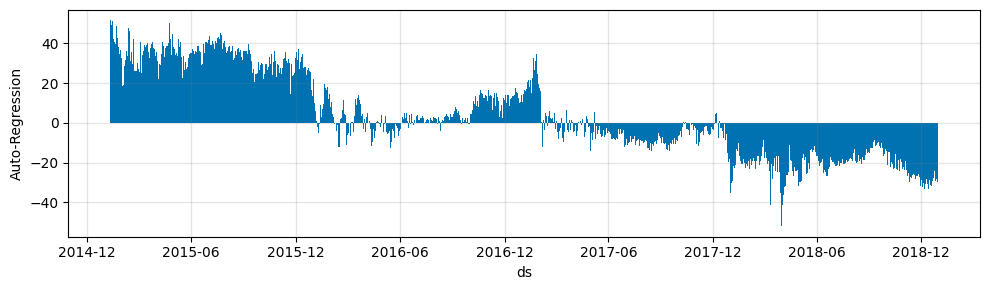

In [33]:
m.plot_components(forecast, components=["autoregression"])

# **Lagged Regressors**

Lagged regressors are used to correlate other observed variables to our target time series. For example the temperature of the previous days might be a good predictor of the temperature of the next day.

They are often referred to as exogenous variables or as covariates. Unlike future regressors, the future of a lagged regressor is unknown to us.

At the time t of forecasting, we only have access to their observed, past values up to and including t-1.

Lagged Regressors(t) = L(t) = SUM_xoX L_x(x_t-1, x_t-2,...,x_t-p)

First we load a new dataset which also contains the temperature.

In [34]:
# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial04.csv")
df.head()

ds      y  temperature
0  2015-01-01  64.92       277.00
1  2015-01-02  58.46       277.95
2  2015-01-03  63.35       278.83
3  2015-01-04  50.54       279.64
4  2015-01-05  64.89       279.05

In [35]:
# Optional:To align the scale of temperature with the energy price, we convert it to Farenheit:
df["temperature"] = (df["temperature"] - 273.15) * 1.8 + 32

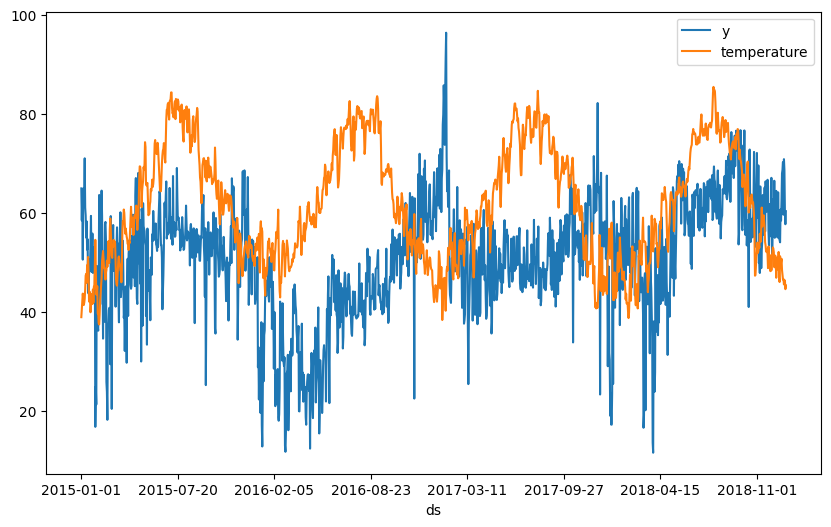

In [36]:
fig = df.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))

From the data we can see that there is a weak inverse relationship of electricity price to temperature. We start with our model from the previous tutorial and then add temperature as a lagged regressor to our model.

In [37]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    n_lags=10,  # Autogression
)
m.set_plotting_backend("matplotlib")

# Add temperature of last three days as lagged regressor
m.add_lagged_regressor("temperature", n_lags=3)

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

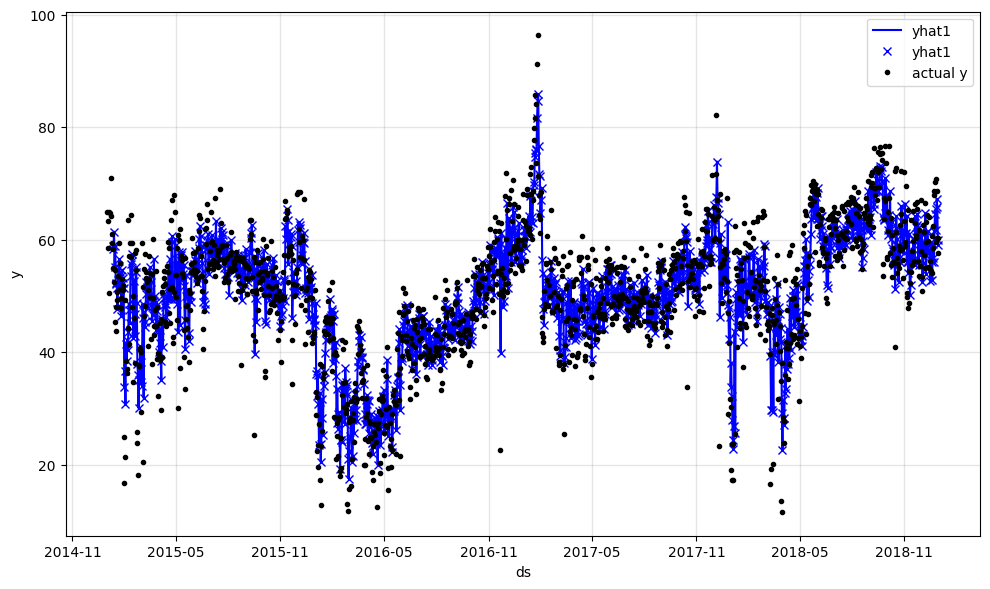

In [38]:
# set plotting to focus on forecasting horizon 1 (the only one for us here)
m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast)

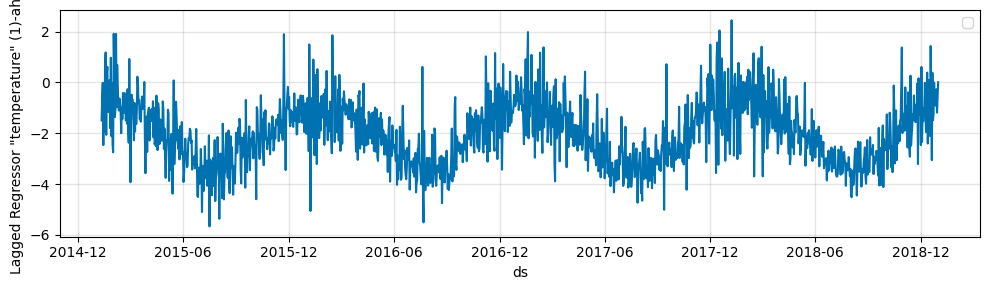

In [39]:
# show the component's forecast contribution
m.plot_components(forecast, components=["lagged_regressors"])

We see that the temperatur impact the forecasted price by few units. Compared to the overall price fluctuations, the temperature impact seems minor, but not insignificant.

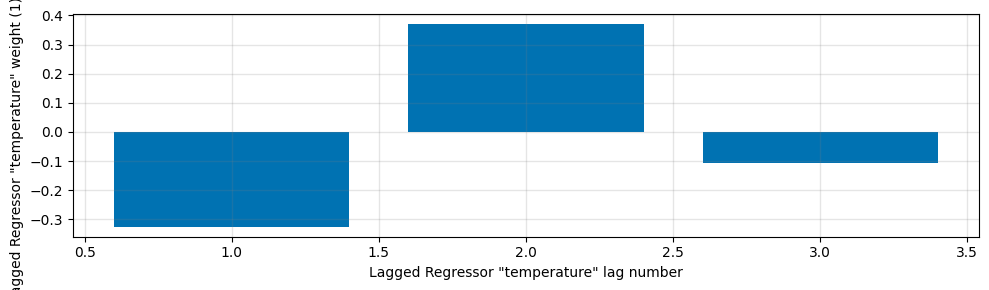

In [40]:
# visualize model parameters of lagged regression
m.plot_parameters(components=["lagged_regressors"])

The model learns a different weights for each of the lags, which may also capture changes in the direction of temperature.

Let us explore how our model improved after adding the lagged regressor.

In [42]:
metrics.tail(3)

MAE      RMSE      Loss  RegLoss  epoch
170  4.904602  6.581486  0.005270      0.0    170
171  4.934252  6.649384  0.005331      0.0    171
172  4.926142  6.569680  0.005321      0.0    172

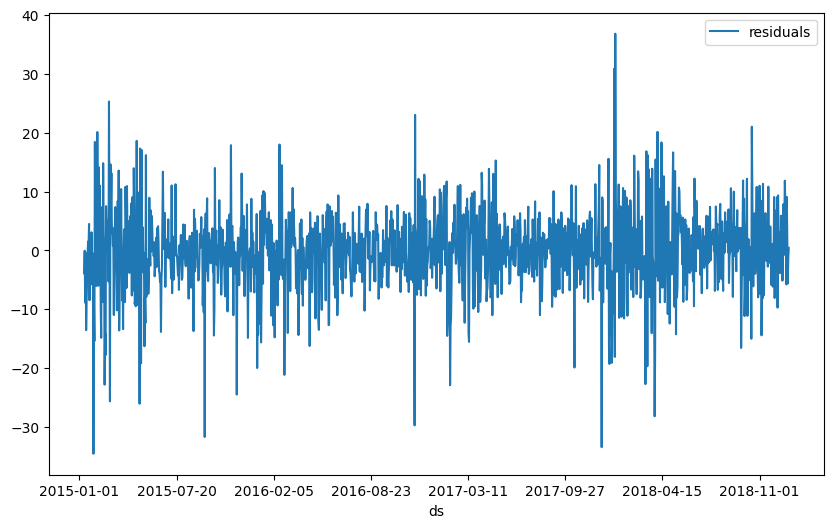

In [43]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

# **Future Regressors**

To model future regressors, both past and future values of these regressors have to be known. So in contrast to the lagged regressors in the previous tutorial, future regressors also have a forecasted value for the future in addition to the historic values.

In [44]:
df.head(n=2)

ds      y  temperature
0  2015-01-01  64.92        38.93
1  2015-01-02  58.46        40.64

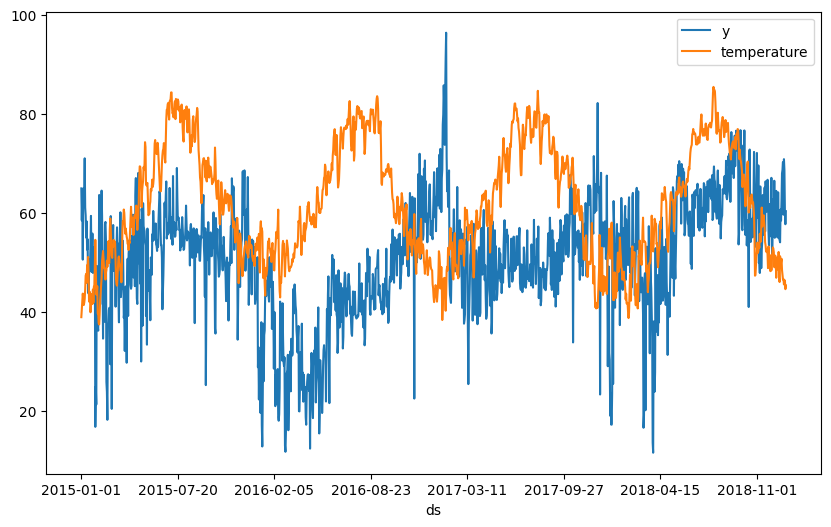

In [45]:
fig = df.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

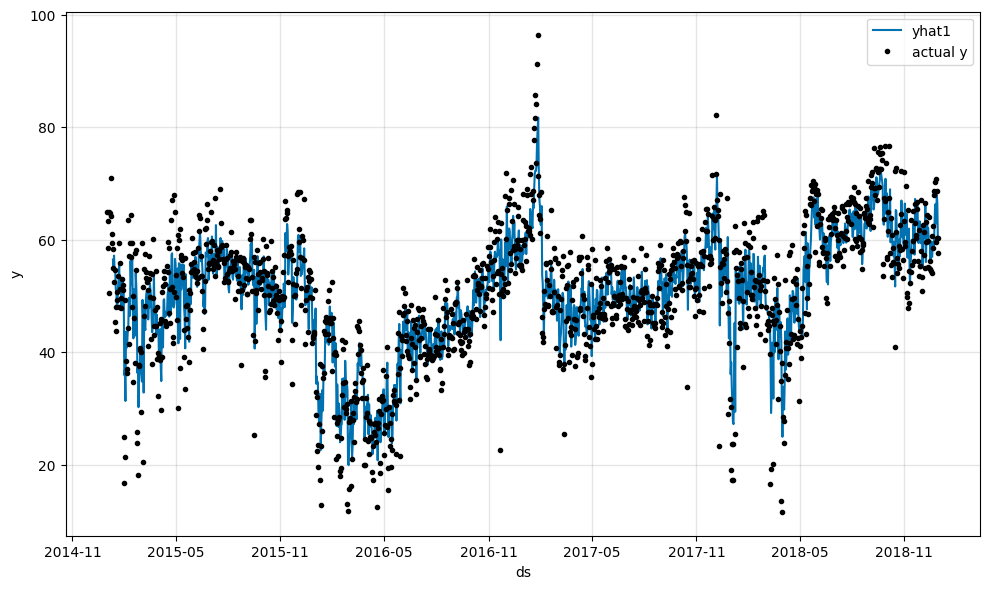

In [46]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)
m.set_plotting_backend("matplotlib")

# Add the new future regressor
m.add_future_regressor("temperature")

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

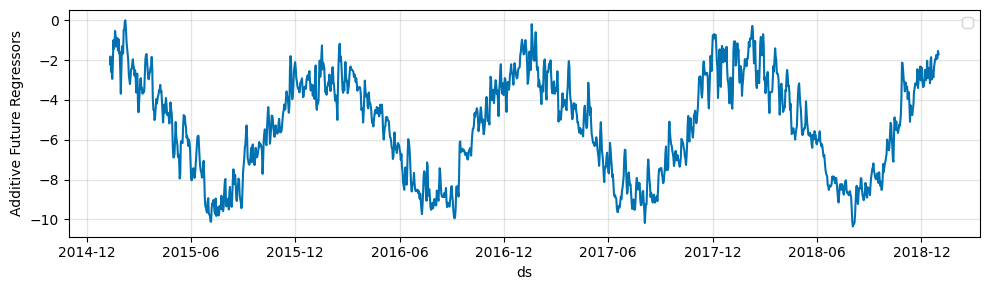

In [47]:
m.plot_components(forecast, components=["future_regressors"])

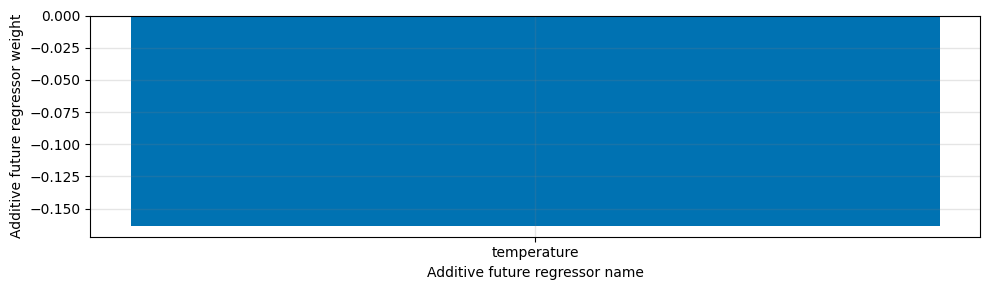

In [48]:
m.plot_parameters(components=["future_regressors"])

In [49]:
metrics

MAE        RMSE      Loss  RegLoss  epoch
0    141.783600  172.448349  1.537165      0.0      0
1    132.887543  162.066772  1.420698      0.0      1
2    123.114426  149.907822  1.292557      0.0      2
3    111.173561  135.567001  1.139194      0.0      3
4     96.566406  118.298340  0.953244      0.0      4
..          ...         ...       ...      ...    ...
168    4.849439    6.463241  0.005079      0.0    168
169    4.857707    6.472280  0.005083      0.0    169
170    4.882351    6.471035  0.005127      0.0    170
171    4.894137    6.515164  0.005125      0.0    171
172    4.896720    6.524572  0.005141      0.0    172

[173 rows x 5 columns]

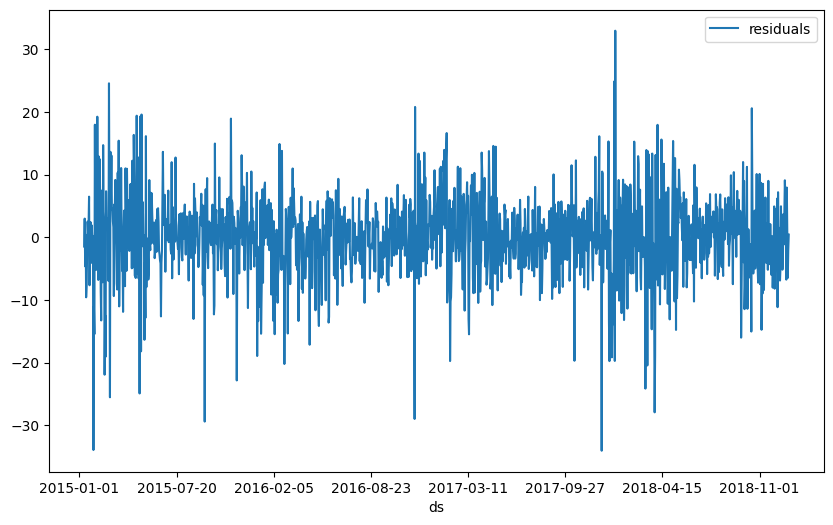

In [50]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

# **Events and holidays**

There are two ways to add special events to NeuralProphet: custom events and predefined country holidays. Both can be used to model special occasions and events that are not captured by the other components. These special events can help to improve the model's performance and interpretability.

First we look into country holidays, later we will explore custom events.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

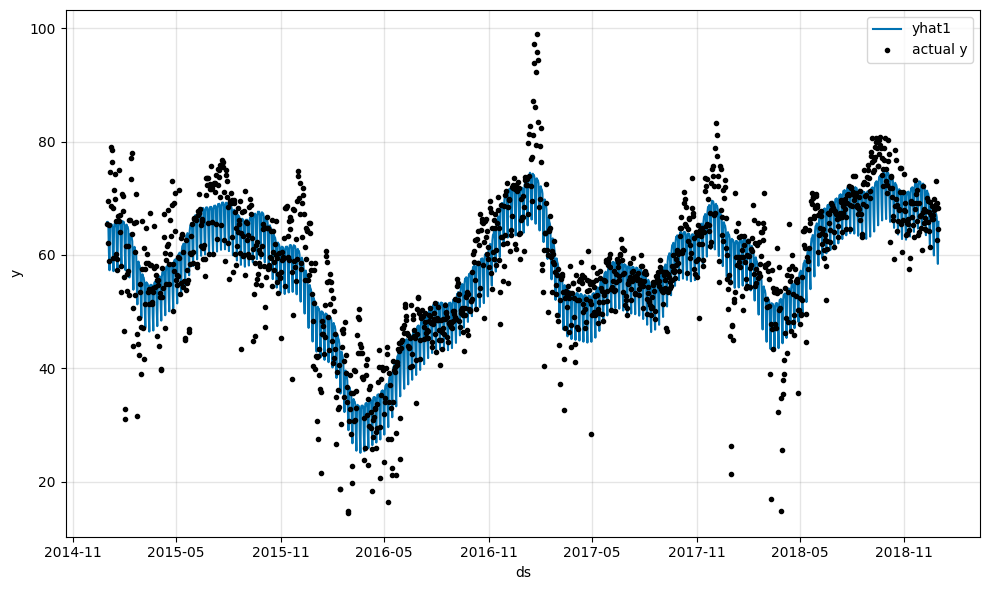

In [51]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
df.head()

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Default model
m = NeuralProphet()
m.set_plotting_backend("matplotlib")

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

NeuralProphet supports a wide range of countries and regions. The full list can be found in the pyholidays documentation, which is internally used for country holiday support.

Country holidays can easily be added with the add_country_holidays function:

In [53]:
m = NeuralProphet()
m.set_plotting_backend("plotly")

m = m.add_country_holidays("US")

metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

Effects from special events or holidays may occur sporadically. Such events are modelled analogous to future regressors, with each event *e* as a binary variable e **𝜖** [0,1], signaling whether the event occurs on the particular day or not.

# Custom events

Custom events are very similar to country holidays, but can be used to model any special event. The only difference is that the event name and occasions with dates need to be specified by the user. Furthermore, the user has to either have the events included in the training data or prepare the dataset accordingly. We will explore the latter option in the following example to illustrate how the custom event dataset has to look like.

In [54]:
# https://eswd.eu/cgi-bin/eswd.cgi

df_events = pd.DataFrame(
    {
        "event": "extreme_weather",
        "ds": pd.to_datetime(
            [
                "2018-11-23",
                "2018-11-17",
                "2018-10-28",
                "2018-10-18",
                "2018-10-14",
            ]
        ),
    }
)

m = NeuralProphet()
m.set_plotting_backend("plotly")

m.add_events("extreme_weather")

df_all = m.create_df_with_events(df, df_events)

metrics = m.fit(df_all)
forecast = m.predict(df_all)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

In [55]:
m.plot_components(forecast)

In [56]:
m.plot_parameters()

# **Uncertainty**
NeuralProphet does support multiple ways to incorporate uncertainty into the forecast. In this tutorial, we will explore the quantile regression uncertainty feature. You can read more on Quantile regression on Wikipedia.

We start with the NeuralProphet base model from the previous tutorials and look at how to add uncertainty modelling to the forecast.

In [57]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

In comparison to point forecasting, uncertainty modelling predicts an interval of possible values for the forecast. Assuming we want the true value to be within the estimated interval with a probability of 90%, we set the confidence level to be 0.9. We define two quantiles, 0.05 and 0.95, which correspond to the 5th and 95th percentiles of the distribution of the forecast. The 90% confidence interval is then the difference between the 5th and 95th percentiles.

In [58]:
confidence_level = 0.9

boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

Setup model with uncertainty using the 10th and 90th percentiles.

In [59]:
# Create NeuralProphet model with list of quantiles
m = NeuralProphet(quantiles=quantiles)
m.set_plotting_backend("plotly")

metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

For the above method we used a quantile regression model, that uses the *pinball loss function* to assess the goodness-of-fit. While the defined coverage is guaranteed for the training date, it is not guaranteed for unseen data. More complex methods like Conformal Prediction can be used to guarantee *marginal coverage* for unseen data:

In [60]:
# evaluate uncertainy on calibration set
train_df, cal_df = m.split_df(df, valid_p=0.1)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = m.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
m.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

Predicting: 46it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/uncertainty.py:122: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




# **Global Model**
Working with panel data (multiple time series). NeuralProphet allows to model local and global components.

We are using the ERCOT dataset which contains data for multiple regions. NeuralProphet requires the data to be in a single column with an additional ID column to identify the region.

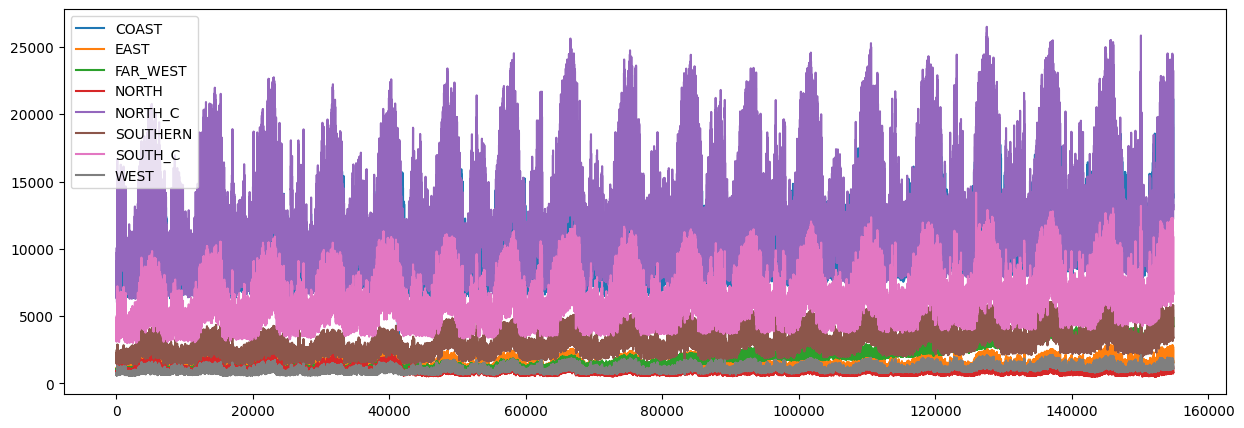

In [61]:
import pandas as pd

df = pd.read_csv(
    "https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/multivariate/load_ercot_regions.csv"
)
fig = df.plot(figsize=(15, 5))

First we define a base model which uses global modelling. This means all regions are modelled together.

In [64]:
df.tail()

ds     COAST     EAST  FAR_WEST   NORTH   NORTH_C  \
154849  2021-08-31 20:00:00  14477.26  1594.07   4307.99  832.71  13920.14   
154850  2021-08-31 21:00:00  14044.85  1565.64   4252.85  799.24  13308.33   
154851  2021-08-31 22:00:00  13796.10  1519.51   4213.14  777.39  12938.13   
154852  2021-08-31 23:00:00  13746.95  1498.90   4188.78  768.89  12876.06   
154853  2021-09-01 00:00:00  14035.90  1542.56   4216.02  787.35  13245.11   

        SOUTHERN  SOUTH_C     WEST  
154849   3666.45  7113.79  1150.02  
154850   3503.66  6805.93  1112.36  
154851   3396.58  6611.26  1086.27  
154852   3340.30  6589.14  1075.76  
154853   3387.29  6753.29  1090.01

In [63]:
df.shape

(154854, 9)

In [65]:
from neuralprophet import NeuralProphet, set_log_level

# Here we use the same dataset only preprocessed to match NeuralProphet's input format
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/multivariate/ercot-panel.csv")
df.head()

# Disable log messages below error
set_log_level("ERROR")

# Base model
m = NeuralProphet()
m.set_plotting_backend("plotly")
metrics = m.fit(df, freq="H")
forecast = m.predict(df)
m.plot(forecast, df_name="NORTH_C")

Finding best initial lr:   0%|          | 0/283 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

We then define a second model which uses local modelling. This means each region is modelled separately for trend and seasonality.

In [67]:
m = NeuralProphet(
    trend_global_local="local",
    season_global_local="local",
)
m.set_plotting_backend("plotly")
metrics = m.fit(df, freq="H")
forecast = m.predict(df)
m.plot(forecast, df_name="NORTH_C")

Finding best initial lr:   0%|          | 0/283 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

# **Validation and Reproducibility**
# Validation

In [68]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly")

Split our dataset into a train and validation set. We will use the validation set to check the performance of our model. The size of the validation set is 20% of our total dataset. Adapt the size with the parameter valid_p in split_df.

In [69]:
df_train, df_val = m.split_df(df, valid_p=0.2)

print("Dataset size:", len(df))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 1462
Train dataset size: 1170
Validation dataset size: 292


Validation is performed by passing the validation set to the fit method during training. The resulting metrics show the performance of the model compared to our validation set.

In [70]:
metrics = m.fit(df_train, validation_df=df_val, progress=None)
metrics

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

MAE_val   RMSE_val  Loss_val  RegLoss_val  epoch        MAE       RMSE  \
0    62.999851  71.251381  0.631166          0.0      0  59.167004  68.857147   
1    60.903549  69.006760  0.599113          0.0      1  57.507694  66.870094   
2    58.240288  66.189331  0.559079          0.0      2  56.223324  65.386208   
3    54.778847  62.517372  0.507893          0.0      3  54.223808  63.176006   
4    50.238647  57.696365  0.442613          0.0      4  51.698578  60.288792   
..         ...        ...       ...          ...    ...        ...        ...   
180   7.317733   9.309739  0.012475          0.0    180   4.588610   6.236936   
181   7.307823   9.298530  0.012445          0.0    181   4.614055   6.217341   
182   7.307591   9.298941  0.012446          0.0    182   4.598739   6.235976   
183   7.308919   9.300318  0.012450          0.0    183   4.584601   6.162248   
184   7.308493   9.299839  0.012449          0.0    184   4.602133   6.211732   

         Loss  RegLoss  
0    0.441753      0.0  
1    0.422055      0.0  
2    0.406573      0.0  
3    0.381707      0.0  
4    0.352315      0.0  
..        ...      ...  
180  0.004257      0.0  
181  0.004279      0.0  
182  0.004277      0.0  
183  0.004244      0.0  
184  0.004270      0.0  

[185 rows x 9 columns]

In [71]:
forecast = m.predict(df)
m.plot(forecast)

For advanced validation and testing methods, check out the Test and CrossValidate tutorial in the How to guides section.

# Reproducibility
The variability of results comes from SGD finding different optima on different runs. The majority of the randomness comes from the random initialization of weights, different learning rates and different shuffling of the dataloader. We can control the random number generator by setting it's seed:

In [72]:
from neuralprophet import set_random_seed

set_random_seed(0)

This should lead to identical results every time you run the model. Note that you have to explicitly set the random seed to the same random number each time before fitting the model.